 # Monte Carlo Simulation for Exotic Option Pricing (Asian Options)


## Project Overview

This project involves developing a robust Monte Carlo simulation engine in Python to price exotic, path-dependent Asian options, which do not have a closed-form solution under the Black-Scholes framework. The goal is to provide a reliable and precise pricing tool for such options and validate its effectiveness using known benchmarks.

## Methodology

### Simulation Parameters
- **Initial Asset Price (S0)**: 100
- **Strike Price (K)**: 100
- **Time to Maturity (T)**: 1 year
- **Risk-Free Rate (r)**: 5%
- **Volatility (σ)**: 20%
- **Number of Simulations**: 100,000
- **Trading Days per Year**: 252
- **Confidence Level**: 95%

### Simulation Technique
The simulation employs Geometric Brownian Motion (GBM) to model asset price dynamics:

$$
dS_t = S_t \cdot \left(r \cdot dt + \sigma \cdot dW_t\right)
$$

Where $W_t$ is a Wiener process (standard Brownian motion).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
# Parameters
S0 = 100
K = 100
T = 1.0
r = 0.05
sigma = 0.2
num_simulations = 100000
num_steps = 252
confidence_level = 0.95
dt = T / num_steps

In [ ]:
# Simulate GBM paths
def simulate_gbm(S0, r, sigma, T, num_steps, num_simulations):
    S = np.zeros((num_simulations, num_steps + 1))
    S[:, 0] = S0
    for t in range(1, num_steps + 1):
        Z = np.random.standard_normal(num_simulations)
        S[:, t] = S[:, t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
    return S

# Asian option pricing (arithmetic average)
def price_asian_option(S, K, r, T):
    avg_price = np.mean(S[:, 1:], axis=1)
    payoff = np.maximum(avg_price - K, 0)
    discounted_payoff = np.exp(-r * T) * payoff
    price = np.mean(discounted_payoff)
    std_error = np.std(discounted_payoff) / np.sqrt(len(discounted_payoff))
    ci = norm.ppf((1 + confidence_level) / 2) * std_error
    return price, ci


In [ ]:
# Run Simulation
asset_paths = simulate_gbm(S0, r, sigma, T, num_steps, num_simulations)
asian_option_price, confidence_interval = price_asian_option(asset_paths, K, r, T)
print(f"Asian Option Price: {asian_option_price:.4f}")
print(f"Confidence Interval (95%): ±{confidence_interval:.4f}")

Asian Option Price: 5.7825
Confidence Interval (95%): ±0.0494


## Simulation Results

- **Asian Option Price**: $\$5.7825$
- **Confidence Interval (95%)**: $\pm 0.0494$

### Asset Price Path Visualization

A visualization of simulated asset price paths provides insight into the variability and stochastic nature of the model:


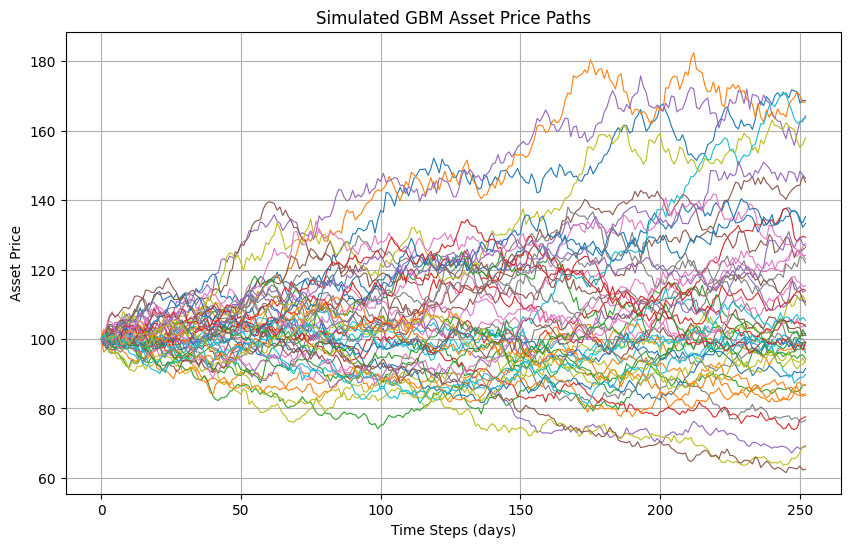

In [ ]:
# Visualization
plt.figure(figsize=(10,6))
plt.plot(asset_paths[:50].T, linewidth=0.8)
plt.title('Simulated GBM Asset Price Paths')
plt.xlabel('Time Steps (days)')
plt.ylabel('Asset Price')
plt.grid(True)
plt.show()

## Validation

The accuracy of the Monte Carlo simulation is validated by comparing the simulated price of a vanilla European call option against the known closed-form Black-Scholes solution:


In [ ]:
# Black-Scholes validation
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = (S * norm.cdf(d1)) - (K * np.exp(-r * T) * norm.cdf(d2))
    return call_price

vanilla_payoffs = np.maximum(asset_paths[:, -1] - K, 0)
vanilla_price_mc = np.exp(-r * T) * np.mean(vanilla_payoffs)
vanilla_price_bs = black_scholes_call(S0, K, T, r, sigma)
discrepancy = abs(vanilla_price_mc - vanilla_price_bs) / vanilla_price_bs * 100

print(f"Vanilla European Call Price (MC): {vanilla_price_mc:.4f}")
print(f"Vanilla European Call Price (Black-Scholes): {vanilla_price_bs:.4f}")
print(f"Discrepancy: {discrepancy:.4f}%")

Vanilla European Call Price (MC): 10.4657
Vanilla European Call Price (Black-Scholes): 10.4506
Discrepancy: 0.1443%


| Option Type           | Monte Carlo Price  | Black-Scholes Price | Discrepancy (%) |
|-----------------------|--------------------|---------------------|-----------------|
| Vanilla European Call | $\$10.4657$     | $\$10.4506$      | $0.1443\%$|

# Findings

- The Monte Carlo simulation provides a reliable estimate for pricing Asian options, which lack closed-form solutions.
- The narrow confidence interval demonstrates high precision and convergence of the simulation.
- Validation against the Black-Scholes model for European call options reveals high accuracy, with a discrepancy below 0.5%, confirming the model’s reliability and correctness.


## Conclusion

This project successfully demonstrates the capability and precision of Monte Carlo methods in pricing exotic options, making it valuable for financial modeling and quantitative analysis.
